<a href="https://colab.research.google.com/github/Nfsu26/utkarshraj/blob/main/dvt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# PIL or Pillow is a library that allows to open, manipulate, and save many different image file formats.
# Load the image using PIL
img_path = '/content/img1.jpg'
image = Image.open(img_path)

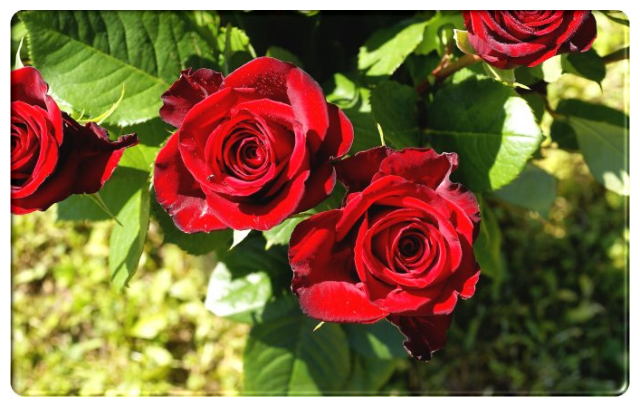

In [ ]:
# Display the image using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide the axes to focus on the image
plt.show()

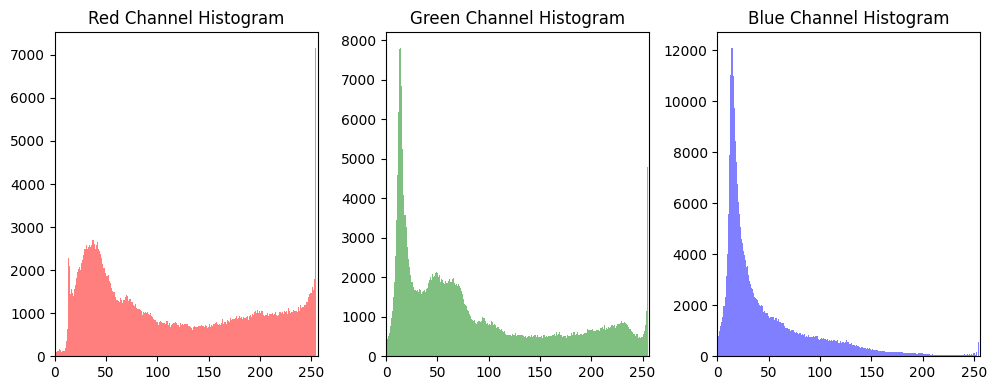

In [ ]:
# create a histogram of the image's pixel intensity values.

# Convert the image to a NumPy array to manipulate the pixel data
#The image object (previously opened with PIL) is converted to a NumPy array for easier manipulation of pixel data. The resulting image_array is a 3D array where the dimensions represent the height, width, and color channels of the image, respectively.
image_array = np.array(image)

# Flatten the array and separate the color channels
#The array is sliced to separate the three color channels (red, green, blue) and each is flattened into a 1D array. This is done to prepare the data for histogram plotting, where we need a list of intensity values for each color channel.
red_channel = image_array[:, :, 0].flatten()
green_channel = image_array[:, :, 1].flatten()
blue_channel = image_array[:, :, 2].flatten()

# Create a histogram plot of the RGB channels
plt.figure(figsize=(10, 4))

# Plot the histogram of the Red channel
plt.subplot(1, 3, 1)
plt.hist(red_channel, bins=256, color='red', alpha=0.5)
plt.title('Red Channel Histogram')
#x-axis limits are set from 0 to 256 to encompass the range of possible pixel values for an 8-bit image.
plt.xlim([0, 256])

#The plt.hist() function creates a histogram for the flattened channel arrays. bins=256 specifies that there should be 256 bins in the histogram (which corresponds to the 256 possible values in an 8-bit color channel). The color parameter sets the color of the histogram, and alpha=0.5 sets the transparency.

# Plot the histogram of the Green channel
plt.subplot(1, 3, 2)
plt.hist(green_channel, bins=256, color='green', alpha=0.5)
plt.title('Green Channel Histogram')
plt.xlim([0, 256])

# Plot the histogram of the Blue channel
plt.subplot(1, 3, 3)
plt.hist(blue_channel, bins=256, color='blue', alpha=0.5)
plt.title('Blue Channel Histogram')
plt.xlim([0, 256])

# Layout adjustments
#plt.tight_layout() adjusts the subplots to fit into the figure area
plt.tight_layout()
plt.show()

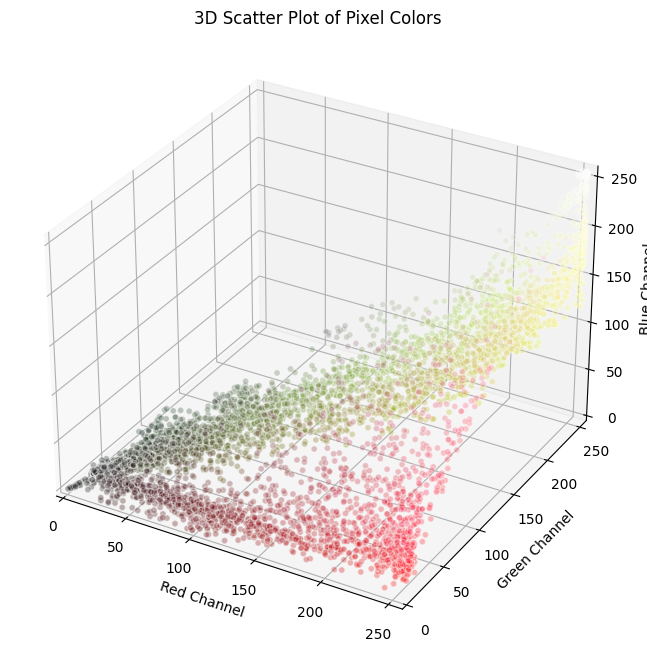

In [ ]:
#create a scatter plot of the image's pixel color values in RGB space.
#create a 3D scatter plot of the pixel color values from an image. It visualizes the distribution of colors within the image in the three-dimensional RGB color space.
# Since the image might be large, we will sample a subset of pixels to keep the scatter plot manageable
sampled_pixels = image_array.reshape(-1, 3)[::50]  # Sample every 50th pixel
#above line converts the image array into a 2D array where each row represents a pixel and the three columns represent the red, green, and blue color channels. The [::50] part takes every 50th pixel from this array. This step is done to reduce the number of points in the scatter plot, which makes the plot easier to generate and interpret.
#For example, if the original image_array contains 30000 pixels (each pixel with three color values), when you do image_array.reshape(-1, 3), NumPy will calculate that the array should have 10000 rows and 3 columns, because 10000 * 3 = 30000, which is the total number of elements in the original array.

# Scatter plot in RGB space
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the pixels in RGB space
#The scatter method creates a scatter plot with the red, green, and blue channel values of the sampled pixels as the x, y, and z coordinates, respectively.
#alpha sets the transparency of the points, edgecolors sets the color of the edge of the markers, and s sets the size of the markers.
ax.scatter(sampled_pixels[:, 0], sampled_pixels[:, 1], sampled_pixels[:, 2],
             c=sampled_pixels/255.0, #Normalize the colors to [0, 1] for matplotlib,
           alpha=0.3, edgecolors='w', s=20)
#edgecolors: This sets the color of the edge of the markers. In this case, 'w' stands for white. This parameter can help distinguish individual points if they overlap or if the points are very dense
#s: This parameter sets the size of the markers in points^2. Here, s=20 means that each point in the scatter plot will have a size of 20 points squared. Adjusting the size of the markers can be useful for visual clarity, especially when dealing with a plot with many points.

# Set the labels
ax.set_xlabel('Red Channel')
ax.set_ylabel('Green Channel')
ax.set_zlabel('Blue Channel')
ax.set_title('3D Scatter Plot of Pixel Colors')

# Set the limits for the axes
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_zlim([0, 255])

# Show the plot
plt.show()


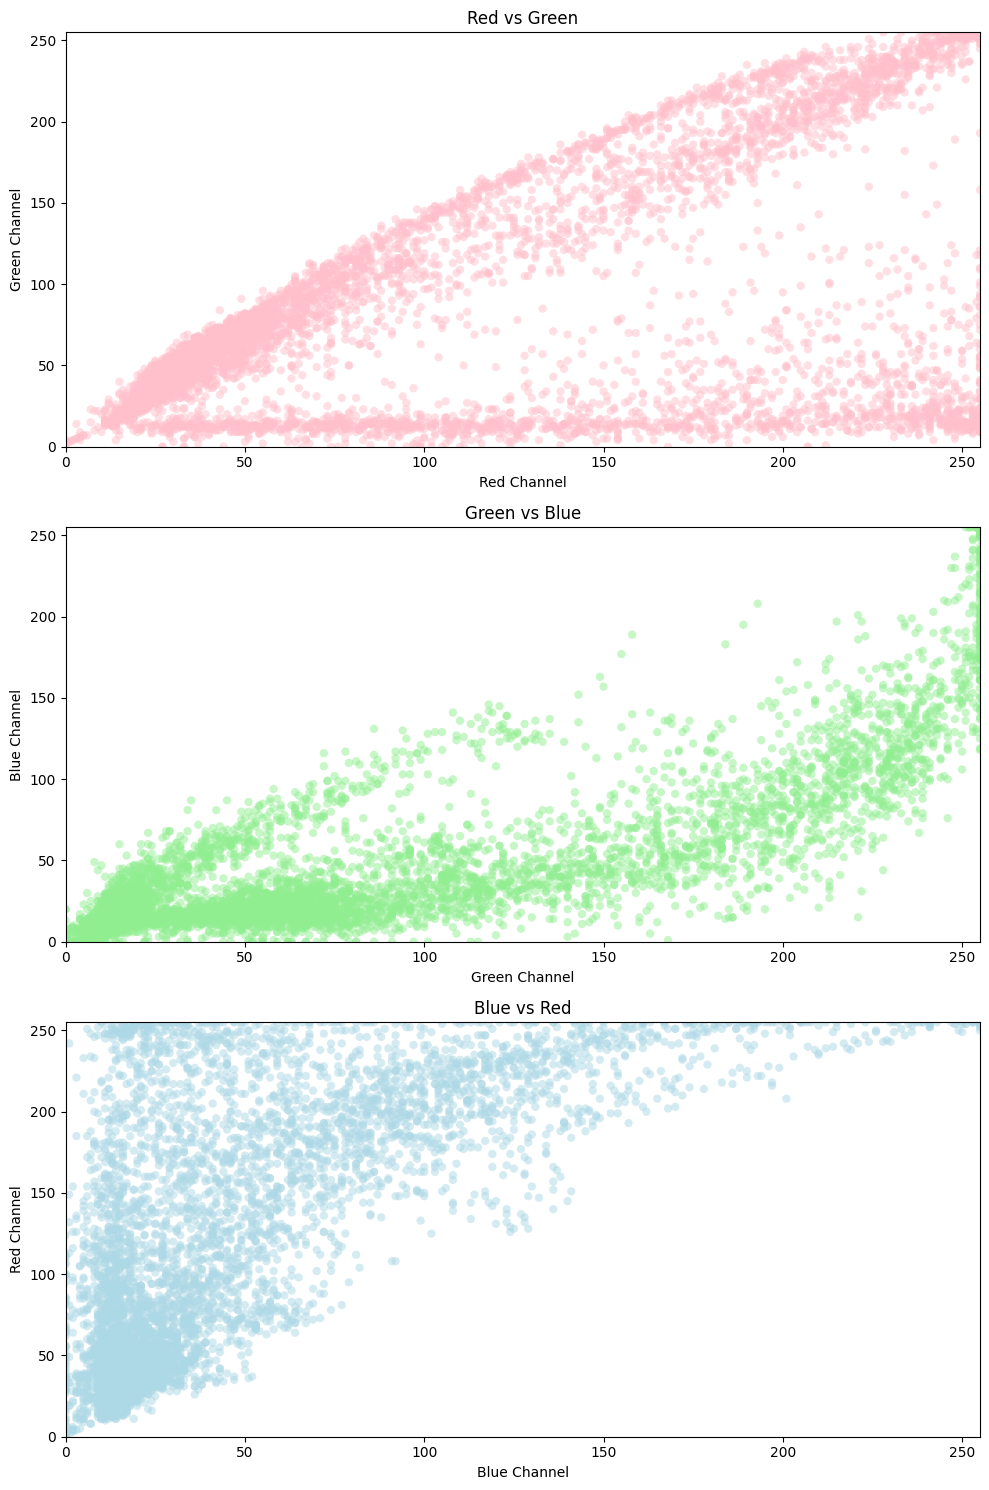

'three additional 2D scatter plots visualizing the relationships between the different RGB channels:\nThe first plot shows the relationship between the Red and Green channels.\nThe second plot shows the relationship between the Green and Blue channels.\nThe third plot shows the relationship between the Blue and Red channels.\nThese plots provide insight into how the channels correlate with each other, which can be useful for tasks like color correction and image analysis.'

In [ ]:
# Create a figure to hold multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Red vs Green scatter plot
axes[0].scatter(sampled_pixels[:, 0], sampled_pixels[:, 1], color='pink', alpha=0.5, edgecolors='none')
axes[0].set_xlabel('Red Channel')
axes[0].set_ylabel('Green Channel')
axes[0].set_title('Red vs Green')

# Green vs Blue scatter plot
axes[1].scatter(sampled_pixels[:, 1], sampled_pixels[:, 2], color='lightgreen', alpha=0.5, edgecolors='none')
axes[1].set_xlabel('Green Channel')
axes[1].set_ylabel('Blue Channel')
axes[1].set_title('Green vs Blue')

# Blue vs Red scatter plot
axes[2].scatter(sampled_pixels[:, 2], sampled_pixels[:, 0], color='lightblue', alpha=0.5, edgecolors='none')
axes[2].set_xlabel('Blue Channel')
axes[2].set_ylabel('Red Channel')
axes[2].set_title('Blue vs Red')

# Set limits for all subplots
for ax in axes:
    ax.set_xlim([0, 255])
    ax.set_ylim([0, 255])

# Layout adjustment
plt.tight_layout()
plt.show()

"""three additional 2D scatter plots visualizing the relationships between the different RGB channels:
The first plot shows the relationship between the Red and Green channels.
The second plot shows the relationship between the Green and Blue channels.
The third plot shows the relationship between the Blue and Red channels.
These plots provide insight into how the channels correlate with each other, which can be useful for tasks like color correction and image analysis."""